# Pure implementation refactor

## Importing dependencies and data

In [152]:
import pickle, gzip, numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

from matplotlib.animation import FuncAnimation
from IPython.core.display import display, HTML

In [118]:
invert_l = lambda x: 100 - x
discretize_l = lambda x: x / 100

In [119]:
%%time

f1 = open('matplot-text.txt', 'w+')
f2 = gzip.open('mnist.pkl.gz', 'rb')

u = pickle._Unpickler(f2)
u.encoding = 'latin1'

train_set, valid_set, test_set = u.load()

f1.close()
f2.close()

CPU times: user 618 ms, sys: 188 ms, total: 806 ms
Wall time: 808 ms


In [120]:
print('train_set length: %s' % len(train_set[0]))
print('valid_set length: %s' % len(valid_set[0]))
print('test_set length: %s' % len(test_set[0]))

train_set length: 50000
valid_set length: 10000
test_set length: 10000


## Building the perceptron units

In [121]:
perceptron_layer = []

epochs = 1
learning_rate = 0.1

In [122]:
class Perceptron_Net(object):
    def __init__(self, weight, bias):
        self.weight = weight
        self.bias = bias
        self.layer = []
        
        self.ok_rate = 0
        self.error_rate = 0
        
        self.clock_vec = []
        self.error_vec = []

    def init_layer(self):
        for i in range(10):
            self.layer.append(Perceptron(i))

        for perceptron in self.layer:
            print(perceptron, perceptron.digit)  # , i.weight, i.bias

    def train_network(self):
        for perceptron in self.layer:
            print('queued train: ', perceptron.digit)
            perceptron.train()

    def test(self):
        self.train_network()
        
        ok = 0
        clock_counter = 0
        
        for i in range(len(test_set[0])):
            maximum = -1
            digitmax = -1
            
            for digit in range(10):
                z = np.dot(test_set[0][i], self.weight[digit]) + self.bias[digit]
                if z > maximum:
                    maximum = z
                    digitmax = digit
            
            if digitmax == test_set[1][i]:
                ok += 1
            
            self.ok_rate = ok * 1.0 / len(test_set[0]) * 100
            self.error_rate = 100 - self.ok_rate

            # string = "%d, %f" % (clock_counter, self.error_rate)
            # print("clock, error: %s, %s" % (clock_counter, self.error_rate))
            # f2.write(string + "\n")
            
            self.clock_vec.append(clock_counter)
            self.error_vec.append(self.error_rate)
            
            
            clock_counter += 1 # 10

        #self.error_rate = 100 - self.ok_rate
        self.error_rate = 100 - (ok * 1.0 / len(test_set[0]) * 100)
        self.ok_rate = ok * 1.0 / len(test_set[0]) * 100
        
        assert self.error_rate == 100 - self.ok_rate, 'your ok_rate or error_rate is F-ed up'
        
        print("Final result: %s%%" % self.ok_rate)
        print("Error rate: %s%%" % self.error_rate)


In [123]:
class Perceptron(object):

    # error = 1
    # errorRate = 100 - perceptron_net.ok_cnt

    def __init__(self, digit):
        self.digit = digit

    def description(self):
        print("This is a perceptron object")

    def activation(self, input):
        # Function used for activation of the neuron
        if (input > 0): return 1
        return 0

    def expected(self, value):
        if self.digit == value:
            return 1
        return 0


    def train(self):
        '''
        global epochs
        allClassified = False

        timeCounter = 0
        while not allClassified and epochs > 0:
            allClassified = True
            # for x, t in train_set:
            x = train_set[0]
            t = train_set[1]
            for i in range(len(train_set[0])):
                # compute net input
                z = np.sum(np.dot(self.weight[i], x[i]), self.bias[self.digit])
                # classify the sample
                output = self.activation(z)
                # adjust the weights
                self.weight[self.digit] = np.sum(self.weight[i], (self.expected(t[i]) - output) * x[i] * learning_rate)  #* a[i] * learning_rate, for j in x[i])# adjust the weights
                # adjust the bias
                self.bias[self.digit] = self.bias[self.digit] + (t[i]-output) * learning_rate
                if output != t[i]:
                    allClassified = False

                self.error = self.expected(t[i]) - output
                if self.digit == 0:
                    str = "%d,%d" % (timeCounter, self.error)
                    print str
                    #f2.write(str + "\n")
                timeCounter += 10
        epochs = epochs - 1
        #f2.close
        '''

        print("###Train digit: " + str(self.digit))
        for i in range(len(train_set[0])):
            z = np.dot(
                    train_set[0][i],
                    perceptron_net.weight[self.digit]
                ) + perceptron_net.bias[self.digit]
            
            output = self.activation(z)
            x = np.array(
                train_set[0][i]
            ).dot(
                (self.expected(train_set[1][i]) - output)
                * learning_rate
            )
            perceptron_net.weight[self.digit] = np.add(perceptron_net.weight[self.digit], x)
            perceptron_net.bias[self.digit] += (
                (self.expected(train_set[1][i]) - output) \
                * learning_rate)
        print("---Digit trained: " + str(self.digit))


In [124]:
perceptron_net = Perceptron_Net([np.random.uniform(0, 1, size=784) for i in range(10)], np.zeros(10))

perceptron_net.init_layer()
perceptron_net.train_network()
perceptron_net.test()

# plt.line()

<__main__.Perceptron object at 0x7fb94b0a4f98> 0
<__main__.Perceptron object at 0x7fb94b0a4400> 1
<__main__.Perceptron object at 0x7fb94b0a4908> 2
<__main__.Perceptron object at 0x7fb94b0a4668> 3
<__main__.Perceptron object at 0x7fb94b0cd9e8> 4
<__main__.Perceptron object at 0x7fb94b0cd0f0> 5
<__main__.Perceptron object at 0x7fb94b0cde48> 6
<__main__.Perceptron object at 0x7fb94b0cde80> 7
<__main__.Perceptron object at 0x7fb94b0cda90> 8
<__main__.Perceptron object at 0x7fb94b0cde10> 9
queued train:  0
###Train digit: 0
---Digit trained: 0
queued train:  1
###Train digit: 1
---Digit trained: 1
queued train:  2
###Train digit: 2
---Digit trained: 2
queued train:  3
###Train digit: 3
---Digit trained: 3
queued train:  4
###Train digit: 4
---Digit trained: 4
queued train:  5
###Train digit: 5
---Digit trained: 5
queued train:  6
###Train digit: 6
---Digit trained: 6
queued train:  7
###Train digit: 7
---Digit trained: 7
queued train:  8
###Train digit: 8
---Digit trained: 8
queued train:  

In [125]:
HTML('<h1>Accuracy: %s%%</h1>' % perceptron_net.ok_rate +
     '<h2>- Error rate: %.2f%%</h2>' % perceptron_net.error_rate
)

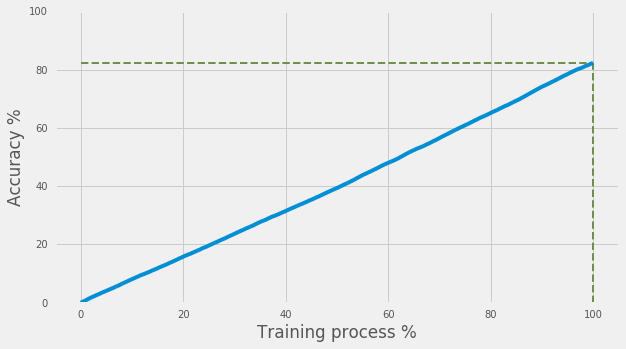

In [153]:
plt.figure(figsize=(9,5))

x = list(map(discretize_l, perceptron_net.clock_vec))
y = list(map(invert_l, perceptron_net.error_vec))

plt.plot(x, y)

plt.vlines(x[-1], 0, y[-1], lw=2, color='C3', linestyle="dashed")
plt.hlines(y[-1], 0, x[-1], lw=2, color='C3', linestyle="dashed")

plt.ylim((0, 100))
plt.xlabel('Training process %')
plt.ylabel('Accuracy %')

plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

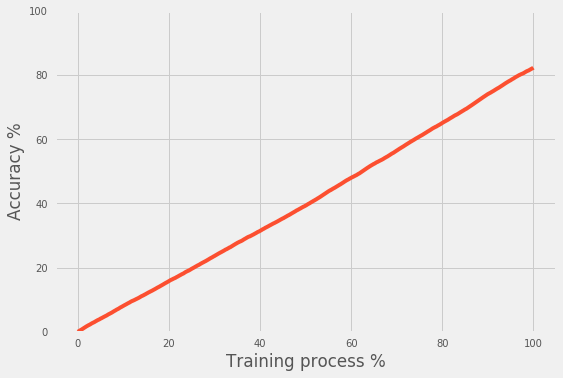

In [163]:
# plt.figure(figsize=(9,5))

fig, ax = plt.subplots()

x = list(map(discretize_l, perceptron_net.clock_vec))
y = list(map(invert_l, perceptron_net.error_vec))


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


line, = ax.plot([], [], lw=2)
ax.plot(x, y)

plt.ylim((0, 100))
plt.xlabel('Training process %')
plt.ylabel('Accuracy %')



# anim.save('line.gif', dpi=80, writer='imagemagick')
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200) # frames=np.arange(0, 10), interval=200


anim.save('line.gif', dpi=80, writer='imagemagick')

plt.show()

In [165]:
anim

plt.show()

In [166]:
display(anim)

---